In [1]:
import numpy as np
import matplotlib.pyplot as plt


def mock_T1(t):
    result = np.zeros(3)
    t2 = 2.5 * 150
    t1 = 1.75 * 150

    for i in range(2048):
        if not result[0] and (t[0][i] > t2):
            if t[1][i] > t1 and t[2][i] > t1:
                result[0] = 1

        if not result[1] and (t[1][i] > t2):
            if t[0][i] > t1 and t[2][i] > t1:
                result[1] = 1

        if not result[2] and (t[2][i] > t2):
            if t[0][i] > t1 and t[1][i] > t1:
                result[2] = 1

        if 1 == result[0] == result[1] == result[2]:
            break

    return result

In [2]:
ids = ["04", "10", "00", "01", "02", "03"]

for id in ids:
    file = f"/cr/tempdata01/filip/iRODS/UubRandoms/converted/LeQuiDon/randoms00{id}_WCD.dat"
    traces = np.loadtxt(file)
    traces = np.split(traces, len(traces) // 3)

    bins = np.arange(-50, 250, 1)
    b1, b2, b3 = [np.zeros(299) for _ in range(3)]
    triggers = np.zeros(3)

    for trace in traces:
        trace = trace[:, 1:] - trace[:, 0, None]
        b1 += np.histogram(trace[0], bins=bins)[0]
        b2 += np.histogram(trace[1], bins=bins)[0]
        b3 += np.histogram(trace[2], bins=bins)[0]

        triggers += mock_T1(trace)

    print(triggers, f"triggers found in {file}")

[0. 0. 0.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/LeQuiDon/randoms0004_WCD.dat
[0. 0. 0.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/LeQuiDon/randoms0010_WCD.dat
[0. 0. 0.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/LeQuiDon/randoms0000_WCD.dat
[0. 0. 0.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/LeQuiDon/randoms0001_WCD.dat
[0. 0. 0.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/LeQuiDon/randoms0002_WCD.dat
[0. 0. 0.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/LeQuiDon/randoms0003_WCD.dat


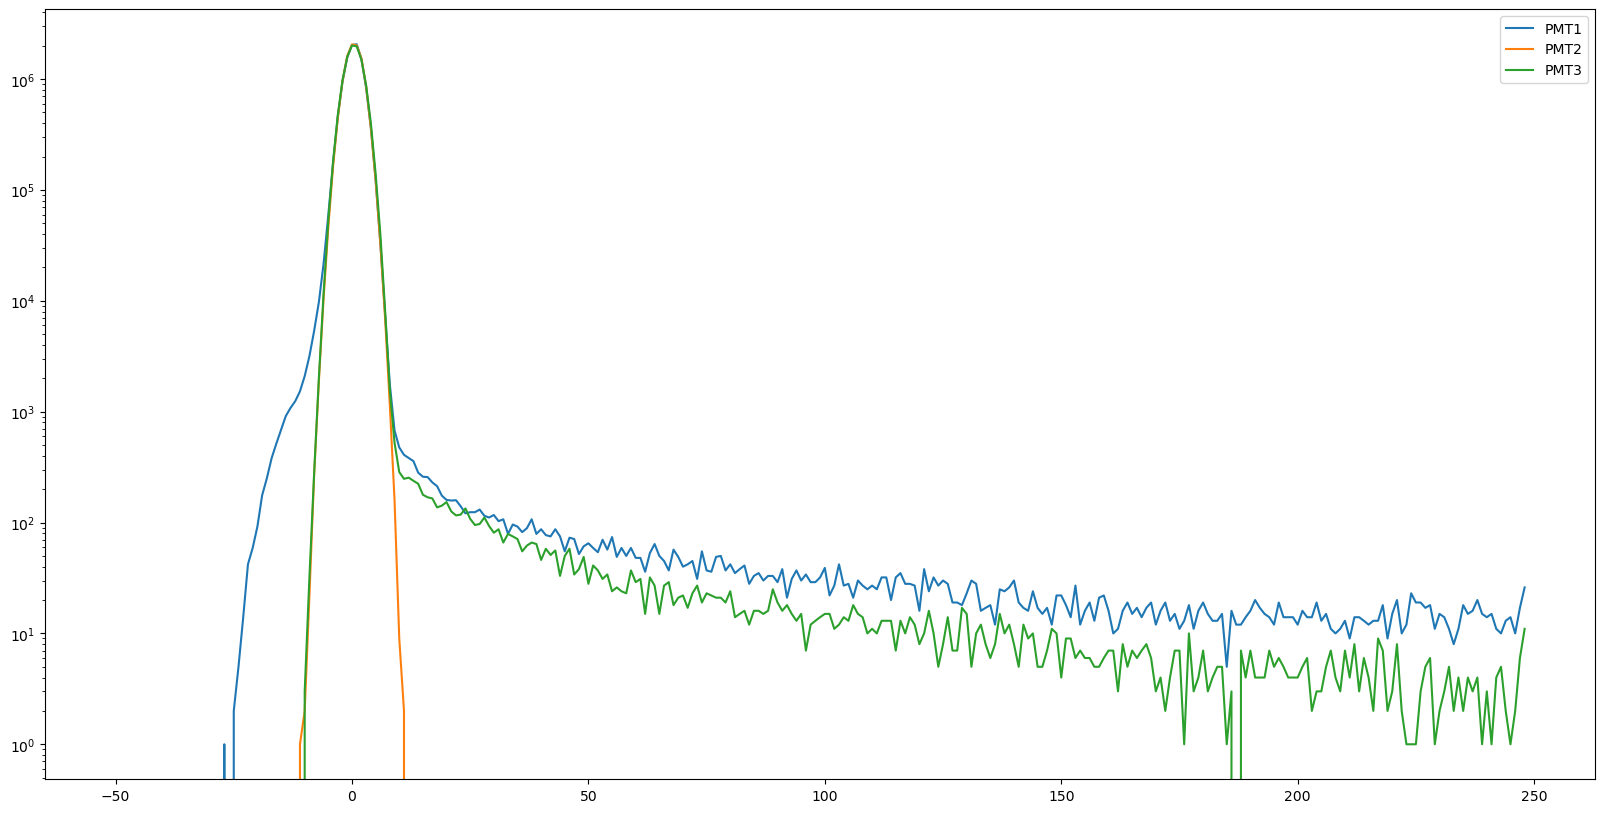

In [4]:
plt.rcParams["figure.figsize"] = [20, 10]

plt.plot(np.arange(-50, 249, 1), b1, label="PMT1")
plt.plot(np.arange(-50, 249, 1), b2, label="PMT2")
plt.plot(np.arange(-50, 249, 1), b3, label="PMT3")

plt.legend()
plt.yscale("log")

In [7]:
print(traces[0].shape)

print(traces[0][0][:10])
print(traces[0][1][:10])
print(traces[0][2][:10])

(3, 2049)
[241. 242. 244. 241. 240. 241. 241. 241. 241. 240.]
[250. 249. 248. 248. 251. 252. 249. 250. 251. 251.]
[242. 246. 241. 241. 242. 241. 244. 238. 241. 241.]


In [9]:
import numpy as np

traces = np.loadtxt(
    "/cr/tempdata01/filip/iRODS/UubRandoms/converted/Granada/randoms0025_WCD.dat"
)
traces = traces[:, 1:] - traces[:, 0, None]
traces = np.split(traces, len(traces) // 3)

In [23]:
print(traces[0][:, (8192 - 4) // 4])

[0. 1. 1.]


In [24]:
print(traces[0])

[[-4.  1.  3. ... -1.  2.  0.]
 [ 3.  3.  2. ...  3.  0.  1.]
 [ 1.  2. -5. ... -2.  4.  1.]]
